# S&P 500 Stocks Pricing Using CAPM

In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

The below code fetches the S&P 500 company data from a Wikipedia page, extracts the ticker symbols, and stores them in the tickers variable for further processing or analysis.

In [ ]:
# Fetching of tickers list from Wikipedia
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
tickers = df.Symbol

The below code fetches the historical close values of the S&P 500 index and the 10-year Treasury bill rate from Yahoo Finance, resamples the S&P 500 data to a monthly frequency, and calculates the average risk-free rate based on the 10-year Treasury bill data.

In [4]:
#Fetching of S&P Close value and 10-year Tbill rate from yahoo finance
end = dt.datetime.now() 
start = end - relativedelta(years=40)
data = yf.download('^GSPC',start=start,end=end)
data = data.resample('M').last()
SP500 = data['Adj Close']
SP500.rename('SP500', inplace=True)
risk_free_rate_data = yf.download('^TNX', start=start, end=end)
risk_free_rate = risk_free_rate_data['Close'].mean() / 100  # Convert percentage to decimal 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


An empty DataFrame called result_df is created to store the results.
A loop iterates over the list of ticker symbols.
For each ticker symbol:
Historical price data is fetched from Yahoo Finance.
If the data is not empty:
The last price is selected and resampled to a monthly frequency.
The historical price data for the ticker and the S&P 500 index are merged.
Logarithmic returns are calculated based on the merged data.
A linear regression model is fitted to estimate the beta coefficient.
The expected return is calculated using the CAPM formula, considering the risk-free rate and market return.
The expected price is calculated based on the last observed price and the expected return.
The ticker symbol, last price, beta coefficient, expected return, and expected price are appended as a new row to result_df.
If an error occurs, an error message is printed, and the loop continues to the next ticker symbol.
At the end of the loop, result_df contains the ticker symbols, last prices, beta coefficients, expected returns, and expected prices for each stock.
The code essentially calculates the expected return and price for each stock based on historical data and the CAPM model, and stores the results in a DataFrame.

In [8]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Symbol', 'Last Price ($)', 'Beta Coefficient', 'Expected Return %', 'Expected Price ($)'])

# Iterate over the tickers and corresponding last prices and betas
for ticker in tickers:
    try:
        data = yf.download(ticker, start=start, end=end, progress=False)
        if data.empty:
            raise ValueError("No data available for ticker: " + ticker)
        data[ticker] = data['Adj Close']
        StockPrice = data[ticker]
        StockPrice = StockPrice.resample('M').last()  # Resample to get monthly data
        merged = pd.concat(objs=[StockPrice, SP500], axis=1)
        log_return = np.log(merged / merged.shift()).dropna()
        Y = sm.add_constant(log_return['SP500'])
        model = sm.OLS(log_return[ticker], Y)
        beta = model.fit().params[1]
        
        SP500_log_return = np.log(SP500/SP500.shift())
        # Calculate the expected return using CAPM: Expected Return = Risk-Free Rate + Beta * (Market Return - Risk-Free Rate)
        market_return = SP500_log_return.mean() * 12  # Convert average monthly return to annual return
        expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
        
        # Calculate the expected price based on the expected return: Expected Price = Last Price * (1 + Expected Return)
        expected_price = StockPrice.iloc[-1] * (1 + expected_return)
        
        # Round-off the expected return to two decimal places
        expected_return = np.round(expected_return * 100, 2)
        
        # Append the ticker, last price, beta, expected return, and expected price as a new row in the result DataFrame
        result_df = result_df.append({'Symbol': ticker, 'Last Price ($)': StockPrice.iloc[-1], 'Beta Coefficient': beta, 'Expected Return %': expected_return, 'Expected Price ($)': expected_price}, ignore_index=True)
        
    except Exception as e:
        print("Error occurred for ticker:", ticker)
        print(str(e))
        continue


C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsat


1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
Error occurred for ticker: BRK.B
No data available for ticker: BRK.B


C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsat


1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted
Error occurred for ticker: BF.B
No data available for ticker: BF.B


C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\tsa\tsat

the code exports the result_df DataFrame, which contains the calculated expected returns and prices for each stock, to an Excel file named "CAPM Expected Return and Price.xlsx".

In [9]:
# Exporting saved data into Excel file 
writer = pd.ExcelWriter('CAPM Expected Return and Price.xlsx')        
result_df.to_excel(writer)
writer.save()

The provided code generates a heat map visualization to display the expected prices of the top 10 stocks with the highest expected returns. Here is the breakdown of the code:

Sorts the result_df DataFrame by the 'Expected Return %' column in descending order using the sort_values() method. The sorted DataFrame is stored in result_df_sorted.
Selects the top 10 stocks with the highest expected return by using the head(10) method on result_df_sorted. The resulting DataFrame is stored in top_10_stocks.
Uses the pivot() method on top_10_stocks to pivot the DataFrame, with 'Symbol' as the index, 'Expected Return %' as the columns, and 'Expected Price ($)' as the values. The pivoted DataFrame is stored in pivot_df.
Creates a figure with a specific size using plt.figure(figsize=(20,18)) to control the size of the heat map.
Uses seaborn (sns) to generate a heat map visualization of pivot_df using the heatmap() function. The color map 'RdYlGn' is used, and the cell values are annotated with two decimal places using annot=True and fmt=".2f".
Sets the title, x-axis label, and y-axis label for the heat map using plt.title(), plt.xlabel(), and plt.ylabel(), respectively.
Displays the heat map using plt.show().

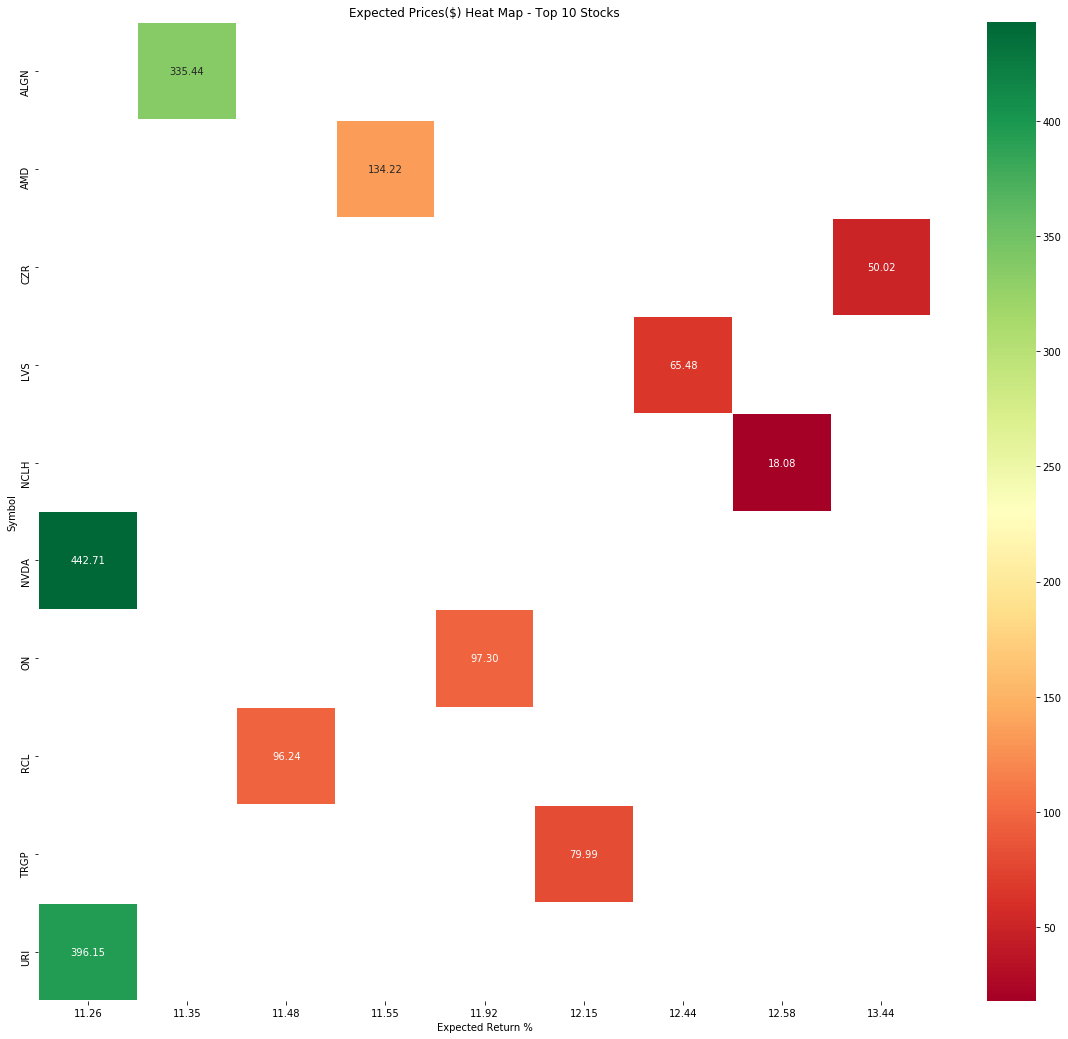

In [10]:
# Sort the result DataFrame by expected return in descending order
result_df_sorted = result_df.sort_values('Expected Return %', ascending=False)

# Select the top 10 stocks with highest expected return
top_10_stocks = result_df_sorted.head(10)

# Pivot the top 10 stocks DataFrame to have tickers as columns and expected prices as values
pivot_df = top_10_stocks.pivot(index='Symbol', columns='Expected Return %', values='Expected Price ($)')

# Create the heat map using seaborn
plt.figure(figsize=(20,18))
sns.heatmap(pivot_df, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Expected Prices($) Heat Map - Top 10 Stocks')
plt.xlabel('Expected Return %')
plt.ylabel('Symbol')
plt.show()